# PyTorch Feed-Forward Neural Network Tests
## Dataset: Did it Rain in Seattle? (1948-2017)

Kaggle Dataset Web Link:

https://www.kaggle.com/datasets/rtatman/did-it-rain-in-seattle-19482017


A separate test Jupyter Notebook displays how a deep aural network model is loaded to a runtime, and predictions are made from the model on test data. The Jupyter Notebook simulates how a deep neural network operates when deployed to a web application online without the deployment steps.

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchmetrics
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

import pandas as pd
import os
import pathlib
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn import metrics

# Hyperparameters

In [2]:
# Model paramters from the training Jupyter Notebook
input_layer = 4        # Sets the number of parameters in the input layer
hidden_layer_1 = 7     # Sets the number of parameters in hidden layer 1
hidden_layer_2 = 7     # Sets the number of parameters in hidden layer 2
hidden_layer_3 = 7     # Sets the number of parameters in hidden layer 3
hidden_layer_4 = 7     # Sets the number of parameters in hidden layer 4
hidden_layer_5 = 7     # Sets the number of parameters in hidden layer 5
hidden_layer_6 = 7     # Sets the number of parameters in hidden layer 6
output_layer = 1       # Sets the number of parameters in the output layer
batch_size = 32        # Sets the batch size
# -----------------

# Set the Device to a GPU or CPU

In [3]:
# If a GPU is available use cuda or use the CPU if not available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Prints out the available processing device to the screen
device

'cpu'

# CSV Dataset Object

In [4]:
# CSVDataset Python class object
class CSVDataset(Dataset):
    
    """CSVDataset PyTorch dataset.
       Args:
       X (NumPy Array): Features of the CSV dataset
       y (NumPy Array): Targets of the CSV dataset
    """
    
    # CSVDataset class constructor
    def __init__(self, X, y):
        # Converts the features and targets into PyTorch tensors
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    # Python method to measure the lenght of the dataset
    def __len__(self):
        return len(self.X)

    # Python method to get an item from the dataset
    def __getitem__(self, idx):
        
        # Gets one sample from the dataset
        features = self.X[idx]
        target = self.y[idx]
        
        # Returns the features and the targets of the CSV dataset
        return features, target

# PyTorch FNN Model Object

In [5]:
# FNN PyTorch Neural Netwrk Model
class FNN(nn.Module):
    
    """Feed Forward Neural Network (FNN) object.
       Args:
       input_layer (tensor): Sets the number of neurons in the input layer.
       hiddel_layer_1 (tensor): Sets the number of neurons in the 1st hidden layer.
       hiddel_layer_2 (tensor): Sets the number of neurons in the 2nd hidden layer.
       output_layer (tensor): Sets the number of neurons in the output layer.
    """
    
    # FNN class constructor
    def __init__(self, input_layer,
                 hidden_layer_1,
                 hidden_layer_2,
                 hidden_layer_3,
                 hidden_layer_4,
                 hidden_layer_5,
                 hidden_layer_6,
                 output_layer):
        super().__init__()
        
        # FNN class attributes
        self.fnn = nn.Sequential(nn.Linear(input_layer, hidden_layer_1),    # Input layer
                                 nn.ReLU(),
                                 nn.Linear(hidden_layer_2, hidden_layer_3), # Hidden Layer 1
                                 nn.ReLU(),
                                 nn.Linear(hidden_layer_4, hidden_layer_5), # Hidden Layer 3
                                 nn.ReLU(),
                                 nn.Linear(hidden_layer_6, output_layer), # Output layer
                                 nn.Sigmoid())

    # Python forward method to control the forward pass of the FNN object
    def forward(self, x):    
        
        # Returns the output results of the FNN object
        return self.fnn(x)

# Initialise the FNN Model

In [6]:
# Defines the FNN PyTorch model
model = FNN(input_layer=input_layer,
            hidden_layer_1=hidden_layer_1,
            hidden_layer_2=hidden_layer_2,
            hidden_layer_3=hidden_layer_3,
            hidden_layer_4=hidden_layer_4,
            hidden_layer_5=hidden_layer_5,
            hidden_layer_6=hidden_layer_6,
            output_layer=output_layer)

# Pritns out the FNN model architecture to the screen
print(model)

FNN(
  (fnn): Sequential(
    (0): Linear(in_features=4, out_features=7, bias=True)
    (1): ReLU()
    (2): Linear(in_features=7, out_features=7, bias=True)
    (3): ReLU()
    (4): Linear(in_features=7, out_features=7, bias=True)
    (5): ReLU()
    (6): Linear(in_features=7, out_features=1, bias=True)
    (7): Sigmoid()
  )
)


# Load the Test Dataset

In [7]:
# Loads the test data to the Jupyter Notebook
X_test = pd.read_csv("./output_csv_data/X_test", header=None).values
y_test = pd.read_csv("./output_csv_data/y_test", header=None).values

In [8]:
# Reshapes the target classes y
y_test.reshape(-1, 1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

# Create the Test DataLoders

In [9]:
# Stores the test CSVDataset in the dataset variable
testset = CSVDataset(X_test, y_test)

# Creates the test PyTorch DataLoader
test_loader = DataLoader(testset, shuffle=False, batch_size=batch_size)

# Reload the Saved Model to the Jupyter Notebook

In [10]:
# Checkpoint file path directory
path = './pytorch-model/'

# Gets the name of the saved model weight file State Dictionary
model_file = os.listdir(path)

# load the daves model to the Jupyter Notebook
model_load = torch.load(path + model_file[0])

# Pritns out the saved model weights file State Dictionary to the screen
model_load

FNN(
  (fnn): Sequential(
    (0): Linear(in_features=4, out_features=7, bias=True)
    (1): ReLU()
    (2): Linear(in_features=7, out_features=7, bias=True)
    (3): ReLU()
    (4): Linear(in_features=7, out_features=7, bias=True)
    (5): ReLU()
    (6): Linear(in_features=7, out_features=1, bias=True)
    (7): Sigmoid()
  )
)

# Test the FNN PyTorch Model

In [11]:
# Defines the torchmetrics evaluation test metrics for the FNN model
accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=2)
recall = torchmetrics.Recall(task="multiclass", average="macro", num_classes=2)
precision = torchmetrics.Precision(task="multiclass", average="macro", num_classes=2)
f1_score = torchmetrics.F1Score(task="multiclass", num_classes=2)

# Stores the test accuracies in a Python list
test_accuracies = []

# Stores all the predictions and labels from the test dataset
y_preds = []
labels = []

# Freezes the model gradients for validation
with torch.no_grad():
    
    # Stores the test accuracy
    test_acc, test_rec, test_pre, test_f1 = 0, 0, 0, 0
    
    # Loads the test dataset batches to the model
    for k, data in enumerate(test_loader):
        
        # Unpacks the features and target classes from the data variable
        X_batch, y_batch = data
        
        # Sends the features and the target classes to the device
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        # Stores the test predictions from the model
        y_pred = model_load(X_batch)
        
        # Calculates the test accuracy, recall, precision and F1 score for the batch
        acc = accuracy(y_pred.round(), y_batch)
        rec = recall(y_pred.round(), y_batch)
        pre = precision(y_pred.round(), y_batch)
        f1 = f1_score(y_pred.round(), y_batch)
        
        # Accumulates the test accuracy, recall, precision and F1 score
        test_acc += acc
        test_rec += rec
        test_pre += pre
        test_f1 += f1
        
        # Appends the test accuracies to the test_accuracies list
        test_accuracies.append(acc)
        y_preds.append(y_pred.round())
        labels.append(y_batch)
        
    # Calculates the overall test accuracy, recall, precision and F1 Score
    test_acc /= len(test_loader)
    test_rec /= len(test_loader)
    test_pre /= len(test_loader)
    test_f1 /= len(test_loader)
    
    # Creates a PyTorch tensor for the labels for the test dataset
    y_pred_tensor = torch.cat(y_preds)
    labels=torch.cat(labels).int()
    
    # Prints out the overall test accuracy and the number of test batches to the screen
    print("Number of Test Batches:", len(test_accuracies))

Number of Test Batches: 184


# Accuracy

In [12]:
# Prints out the overall test accuracy and the number of test batches to the screen
print(f"Test Accuracy {test_acc*100:.2f}%")

Test Accuracy 100.00%


# Recall

In [13]:
# Prints out the overall test Recall and the number of test batches to the screen
print(f"Test Recall {test_rec*100:.2f}%")

Test Recall 100.00%


# Precision

In [14]:
# Prints out the overall test precision and the number of test batches to the screen
print(f"Test Precision {test_pre*100:.2f}%")

Test Precision 100.00%


# F1 Score

In [15]:
# Prints out the overall test F1 score and the number of test batches to the screen
print(f"Test F1 Score {test_f1*100:.2f}%")

Test F1 Score 100.00%


# Confusion Matrix

Text(0.5, 1.0, 'Seattle Weather Confusion Matrix')

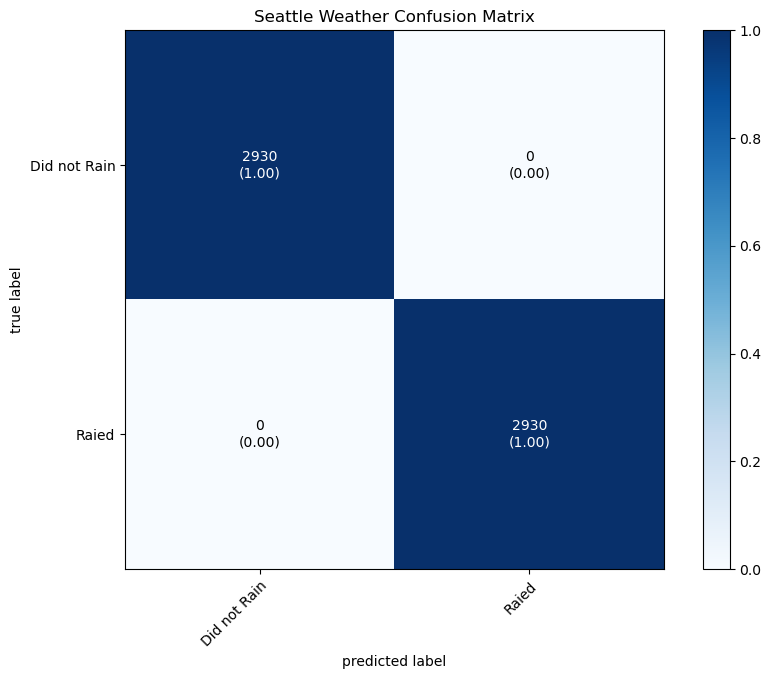

In [16]:
# Class names from the Seattle Weather Dataset
class_names = ['Did not Rain', 'Raied']

# Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=labels)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7),
    show_normed=True,
    colorbar=True
);

# Adds a title to the Confusion Matrix plot
plt.title('Seattle Weather Confusion Matrix')

# Classification Report

In [17]:
# Converts the model predictions and the labels to NumPy arrays from tensors
predictions=y_pred_tensor.numpy()
y_test=labels.numpy()

In [18]:
# Displays the classification report for the deep neural network to the screen
cr = classification_report(y_test, predictions, target_names=['Heart Disease (1)', 'Disease Free (0)', ])
print(cr)

                   precision    recall  f1-score   support

Heart Disease (1)       1.00      1.00      1.00      2930
 Disease Free (0)       1.00      1.00      1.00      2930

         accuracy                           1.00      5860
        macro avg       1.00      1.00      1.00      5860
     weighted avg       1.00      1.00      1.00      5860



# Receiver Operator Characteristic (AUROC)

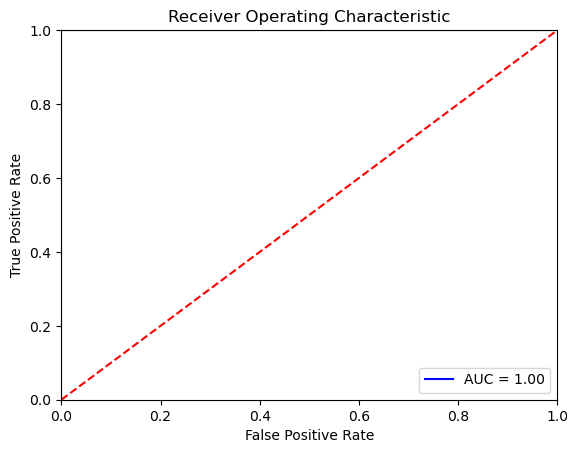

In [19]:
# Stores the false positives, true positives and the thresholds for plotting
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions.round())

# Stores the AUROC curve plot values in the roc_auc variable
roc_auc = metrics.auc(fpr, tpr)

# Plots the Receiver Operating Characteristic AUROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Print out all the Python Variables from the Jupyter Notebook to the Screen

In [20]:
# Prints out all the Python variables to the screen
%whos

Variable                Type                         Data/Info
--------------------------------------------------------------
CSVDataset              type                         <class '__main__.CSVDataset'>
ConfusionMatrix         ABCMeta                      <class 'torchmetrics.clas<...>_matrix.ConfusionMatrix'>
DataLoader              type                         <class 'torch.utils.data.dataloader.DataLoader'>
Dataset                 type                         <class 'torch.utils.data.dataset.Dataset'>
FNN                     type                         <class '__main__.FNN'>
X_batch                 Tensor                       tensor([[ 0.6195, -0.5035<...>5035, -0.2179, -0.2609]])
X_test                  ndarray                      5860x4: 23440 elems, type `float64`, 187520 bytes (183.125 kb)
acc                     Tensor                       tensor(1.)
accuracy                MulticlassAccuracy           MulticlassAccuracy()
ax                      Axes                 